In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
TRAIN_PATH = '../input/mnist_train.csv'
TEST_PATH = '../input/mnist_test.csv'

In [5]:
train_df = pd.read_csv(TRAIN_PATH)

In [6]:
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


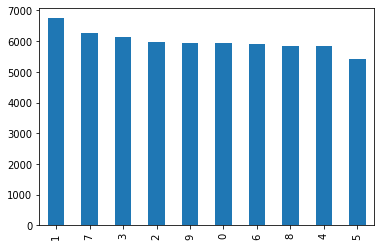

In [7]:
train_df.label.value_counts().plot(kind='bar')

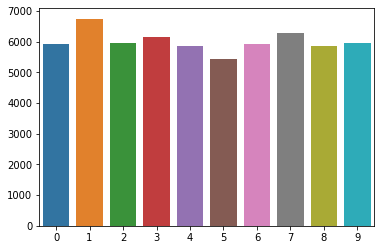

In [14]:
sns.barplot(train_df['label'].value_counts().index, train_df['label'].value_counts().values)

In [1]:
# Create Folds

In [8]:
train_df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
train_df['kfold'] = -1

In [29]:
train_df.sample(frac=1).reset_index(drop=True)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,kfold
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
59996,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
59997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [30]:
from sklearn import model_selection

In [31]:
kf = model_selection.KFold(n_splits=5)

In [32]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [46]:
for fold in enumerate(kf.split(X=train_df)):
    print(fold)

   

(0, (array([12000, 12001, 12002, ..., 59997, 59998, 59999]), array([    0,     1,     2, ..., 11997, 11998, 11999])))
(1, (array([    0,     1,     2, ..., 59997, 59998, 59999]), array([12000, 12001, 12002, ..., 23997, 23998, 23999])))
(2, (array([    0,     1,     2, ..., 59997, 59998, 59999]), array([24000, 24001, 24002, ..., 35997, 35998, 35999])))
(3, (array([    0,     1,     2, ..., 59997, 59998, 59999]), array([36000, 36001, 36002, ..., 47997, 47998, 47999])))
(4, (array([    0,     1,     2, ..., 47997, 47998, 47999]), array([48000, 48001, 48002, ..., 59997, 59998, 59999])))


In [43]:
train_df[:-100]

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,kfold
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59895,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
59896,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
59897,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
59898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [47]:
df = pd.read_csv('../input/mnist_train_folds.csv')

In [48]:
df.head().T

,0,1,2,3,4
label,0,7,4,2,5
1x1,0,0,0,0,0
1x2,0,0,0,0,0
1x3,0,0,0,0,0
1x4,0,0,0,0,0
...,...,...,...,...,...
28x25,0,0,0,0,0
28x26,0,0,0,0,0
28x27,0,0,0,0,0
28x28,0,0,0,0,0


In [55]:
fold = 1


In [65]:
df_train = df[df['kfold']!= fold].reset_index(drop=True)
df_valid= df[df['kfold'] == fold].reset_index(drop=True)

In [71]:
df_train.drop('label',axis=1).values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 4],
       [0, 0, 0, ..., 0, 0, 4],
       [0, 0, 0, ..., 0, 0, 4]])